In [1]:
import numpy as np

In [1]:
from model_script.signal_noise_for_all_components_from_l2 import signal_noise_for_all_components_from_l2

In [2]:
a=signal_noise_for_all_components_from_l2()

In [3]:
a.calculation_snr()

In [8]:
a.resoult[0.1]["Emission"][1]['manhattan'][0],type(a.resoult),a.resoult

(2757.7512647750523,
 dict,
 {0.1: {'Emission': [{'manhattan': [512.4143068380343]},
    {'manhattan': [2757.7512647750523]},
    {'manhattan': [1594.0400995985876]},
    {'manhattan': [1275.1352955234665]},
    {'manhattan': [1834.8419432512492]},
    {'manhattan': [3987.699066563373]},
    {'manhattan': [709.9601611541251]},
    {'manhattan': [1144.5099051121633]},
    {'manhattan': [700.2370608006376]},
    {'manhattan': [626.2443769565393]}],
   'Excitation': [{'manhattan': [1759.751947130506]},
    {'manhattan': [1170.185580379374]},
    {'manhattan': [1427.4519327122919]},
    {'manhattan': [478.5524342539219]},
    {'manhattan': [447.81230960081115]},
    {'manhattan': [462.2719832474076]},
    {'manhattan': [575.027815912304]},
    {'manhattan': [612.70095789467]},
    {'manhattan': [387.8355473773365]},
    {'manhattan': [1130.3044182709111]}]}})

TypeError: unhashable type: 'dict'

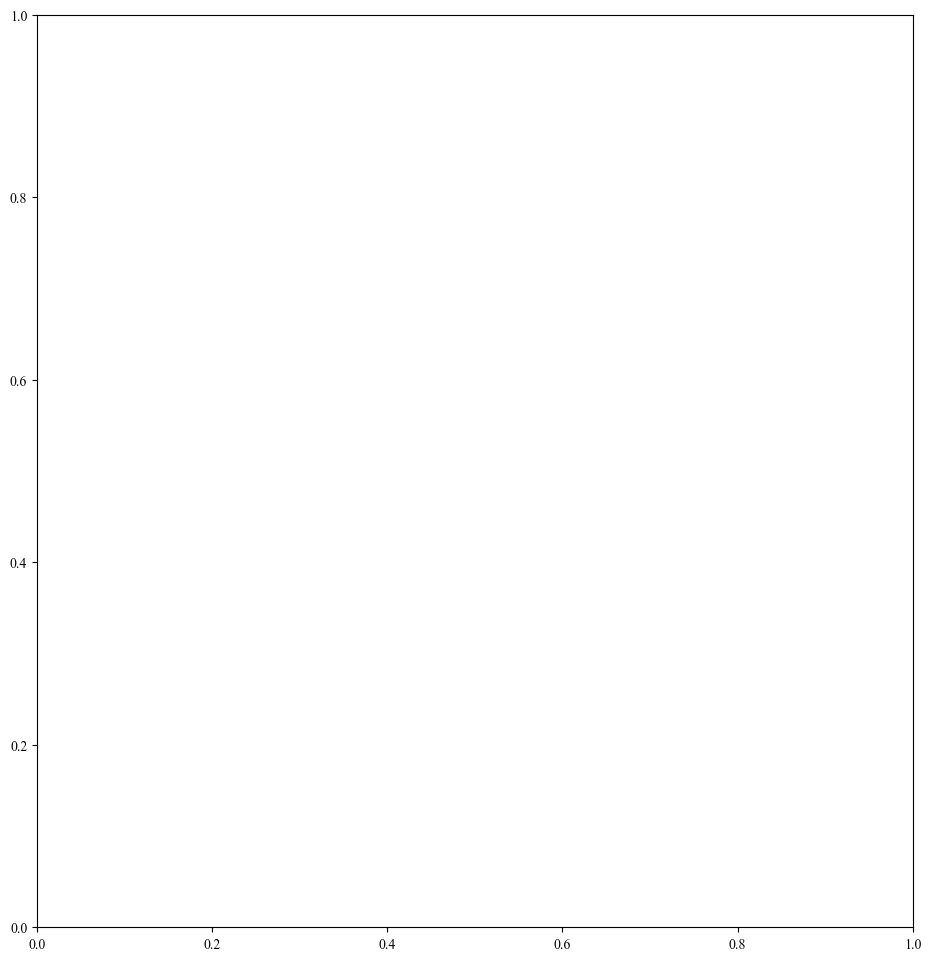

In [7]:
a.paint(save=False)